In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final/turku_df.csv")

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)

In [4]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Year                          7673 non-null   int64         
 1   Month                         7673 non-null   int64         
 2   Day                           7673 non-null   int64         
 3   Date                          7673 non-null   datetime64[ns]
 4   Snow depth mean [cm]          7673 non-null   float64       
 5   Average temperature [°C]      7673 non-null   float64       
 6   cloud_code                    7673 non-null   float64       
 7   Global radiation mean [W/m2]  7673 non-null   float64       
 8   day_of_year                   7673 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3)
memory usage: 509.7 KB


In [20]:
all_years = df["Year"].unique()
all_years.sort()

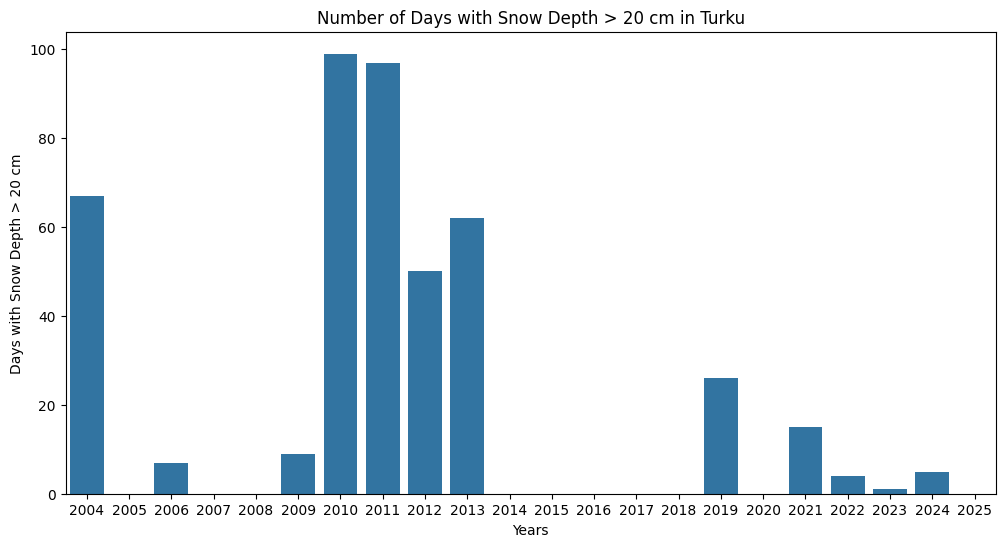

In [25]:
over_20cm_per_year = df[df["Snow depth mean [cm]"] > 20].groupby("Year").size()
over_20cm_per_year = over_20cm_per_year.reindex(all_years, fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=over_20cm_per_year.index, y=over_20cm_per_year.values)


plt.xlabel("Years")
plt.ylabel("Days with Snow Depth > 20 cm")
plt.title("Number of Days with Snow Depth > 20 cm in Turku")


plt.show()